In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [7]:
start = '2008-01-01'
end = '2021-12-31'

df= data.DataReader('AAPL', 'yahoo' , start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.030248
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.931611
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.934350
2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.481350
2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.407982


In [8]:
 df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.289459
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.255417
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.344925
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.171738
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.545380


In [9]:
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.030248
1,2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.931611
2,2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.934350
3,2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.481350
4,2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.407982


In [10]:
df= df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09
2,7.049643,6.881786,6.978929,6.961786,8.420664e+08
3,6.892857,6.388929,6.837500,6.430357,1.455832e+09
4,6.557143,6.079643,6.473214,6.344286,2.072193e+09


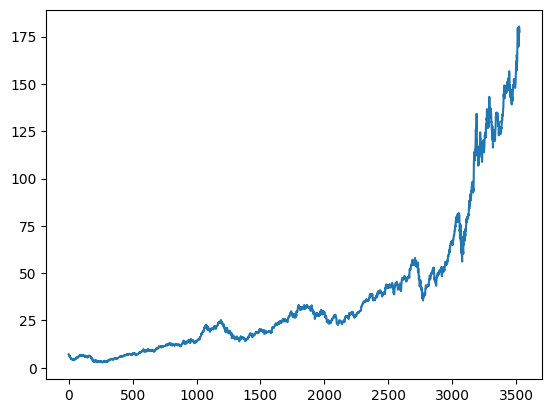

In [11]:
plt.plot(df.Close)

In [12]:
ma100= df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3522    153.3444
3523    153.6667
3524    153.9991
3525    154.3202
3526    154.6399
Name: Close, Length: 3527, dtype: float64

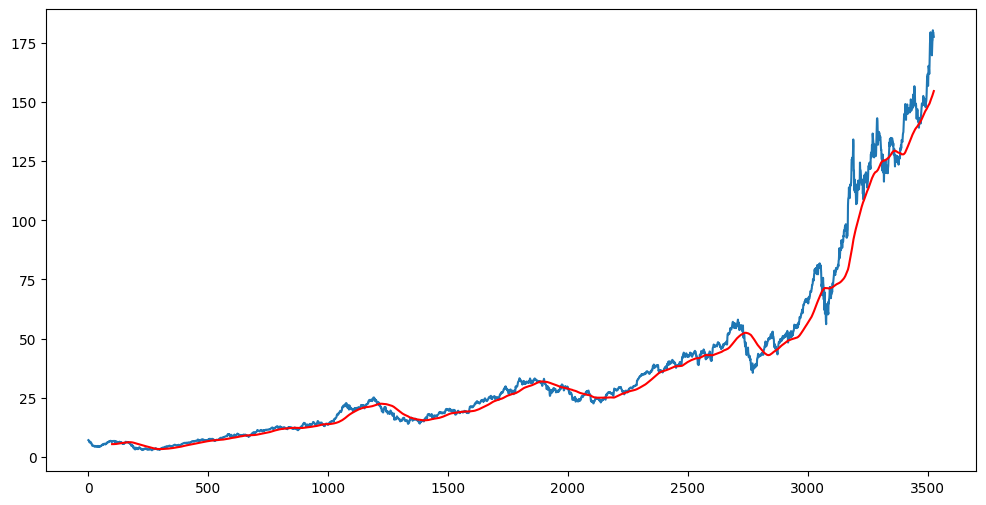

In [58]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3522    142.85570
3523    143.13220
3524    143.40125
3525    143.66845
3526    143.95365
Name: Close, Length: 3527, dtype: float64

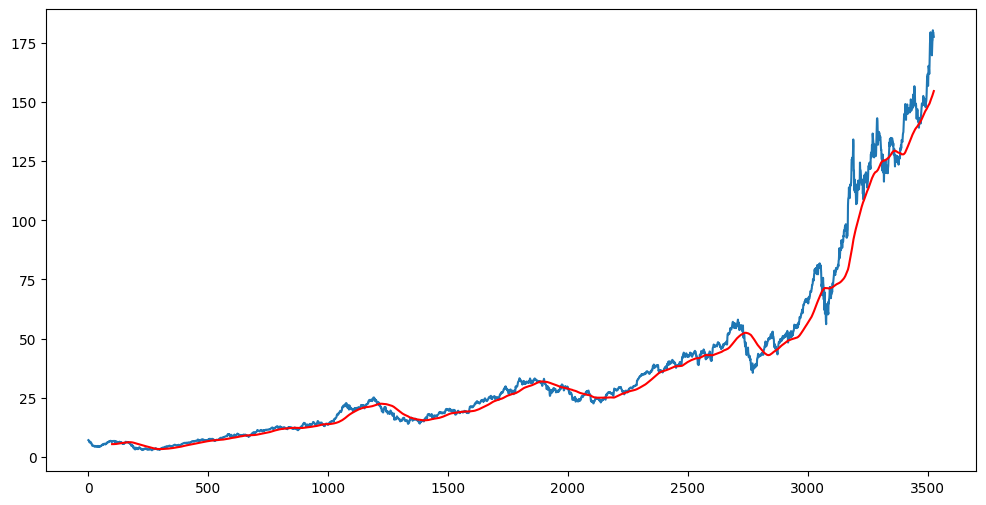

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

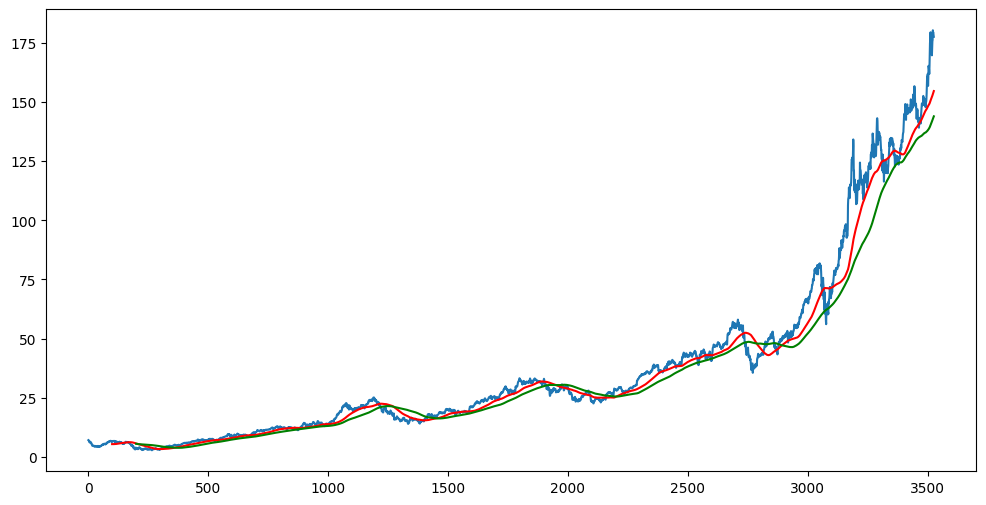

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [17]:
df.shape   #to see how many rows and columns we have

(3527, 5)

In [18]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])    #USING 70% DATA FOR TRAINING
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])    #USING 30% DATA FOR TESTING
print(data_training.shape)
print(data_testing.shape)

(2468, 1)
(1059, 1)


In [19]:
data_training.head()

,Close
0,7.074286
1,6.958571
2,6.961786
3,6.430357
4,6.344286


In [20]:
data_testing.head()

,Close
2468,39.939999
2469,38.994999
2470,39.062500
2471,39.042500
2472,39.275002


In [21]:
#to scale down the data into '0' and '1' we are using min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.11202169],
       [0.10899406],
       [0.10907817],
       ...,
       [0.95381958],
       [0.97272346],
       [0.97658271]])

In [23]:
x_train=[]  # HERE WHAT WE ARE DOING IS FIRST USING FOR EG. 10 DAYS DATA TO PREDICT THE VALUE OF 11TH DAY AND THAT VALUE OF 11TH DAY WILL BE IN THE 'y_train' AND WHEN WE CALCULATE FOR 12TH DAY THEN REMOVE FIRST DAY START FROM 2ND TO 11TH DAY AND THIS WILL BE NOW OUR 'x_train' AND THE PREDICTED VALUE WILL BE 'y_train'
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
# ML MODEL

from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential 

In [25]:
model = Sequential()
model. add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape [1], 1)))
model.add(Dropout (0.2))

model. add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout (0.3))

model. add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout (0.4))

model. add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout (0.5))

model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [40]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 [==============================] - 16s 158ms/step - loss: 0.0022
Epoch 2/50
74/74 [==============================] - 9s 122ms/step - loss: 0.0021
Epoch 3/50
74/74 [==============================] - 9s 125ms/step - loss: 0.0022
Epoch 4/50
74/74 [==============================] - 9s 122ms/step - loss: 0.0020
Epoch 5/50
74/74 [==============================] - 9s 122ms/step - loss: 0.0020
Epoch 6/50
74/74 [==============================] - 9s 122ms/step - loss: 0.0020
Epoch 7/50
74/74 [==============================] - 9s 127ms/step - loss: 0.0021
Epoch 8/50
74/74 [==============================] - 9s 127ms/step - loss: 0.0019
Epoch 9/50
74/74 [==============================] - 9s 127ms/step - loss: 0.0019
Epoch 10/50
74/74 [==============================] - 9s 127ms/step - loss: 0.0021
Epoch 11/50
74/74 [==============================] - 9s 127ms/step - loss: 0.0020
Epoch 12/50
74/74 [==============================] - 9s 128ms/step - loss: 0.0021
Epoch 13/50
74/74 [=====

In [41]:
model.save('keras_model.h5')

In [42]:
past_100_days = data_training.tail(100)

In [43]:
final_df = past_100_days.append(data_testing, ignore_index = True )

C:\temp\ipykernel_11988\847424160.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True )


In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01971923],
       [0.01982283],
       [0.0182515 ],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [45]:
input_data.shape

(1159, 1)

In [46]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [47]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1059, 100, 1)
(1059,)


In [48]:
# MAKING PREDICTIONS

y_predicted = model.predict(x_test)

34/34 [==============================] - 2s 44ms/step


In [49]:
y_predicted.shape

(1059, 1)

In [50]:
scaler.scale_   # TO FIND THE FACTOR BY WHICH THEY WERE SCALE DOWN

array([0.00690691])

In [52]:
scale_factor = 1/0.00690691
y_predicted = y_predicted* scale_factor
y_test = y_test * scale_factor

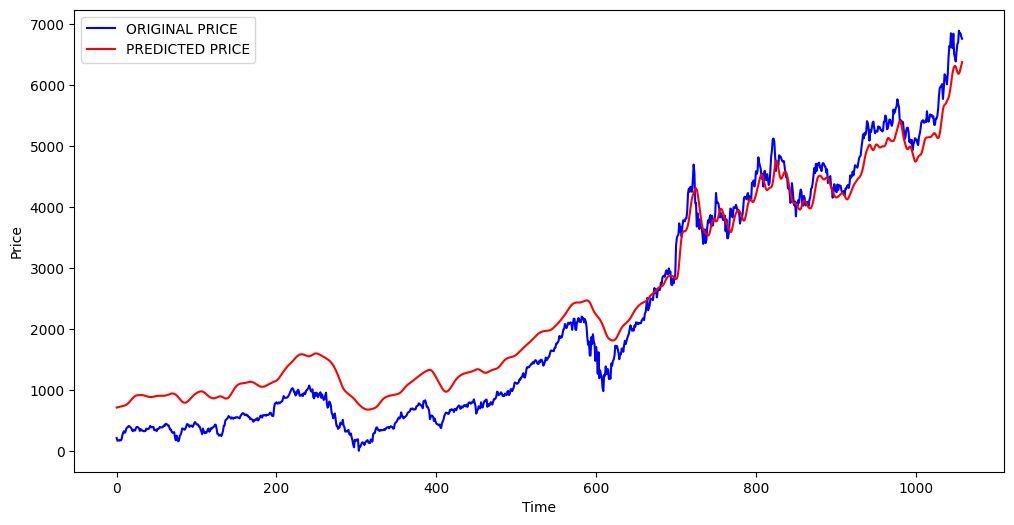

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'ORIGINAL PRICE')
plt.plot(y_predicted, 'r', label = 'PREDICTED PRICE')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()